In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
analytics_data = pd.read_json('lastcallstudios-c8991-default-rtdb-export.json')

# Display the first few rows of the dataframe
df_head = analytics_data.head()
df_head

,analytics,analytics_v2,analytics_v3,analytics_v4,analytics_v5
01d28a36-ae56-487f-abc0-7008d17e3b82,"{'ballsKnockedOff': 5, 'bulletCollisions': 0, ...",NaN,NaN,NaN,NaN
026ff44b-3a11-4fb0-a977-c072a67d1a2e,"{'ballsKnockedOff': 6, 'bulletCollisions': 0, ...",NaN,NaN,NaN,NaN
050ee2d2-dd9d-4925-afd6-8b8fe93601c8,"{'ballsKnockedOff': 4, 'bulletCollisions': 0, ...",NaN,NaN,NaN,NaN
068083c9-e93e-4c48-b801-62574e291227,"{'ballsKnockedOff': 2, 'bulletCollisions': 0, ...",NaN,NaN,NaN,NaN
06c0f29f-c518-4cbd-a91f-cd81875f3b7d,"{'ballsKnockedOff': 0, 'bulletCollisions': 0, ...",NaN,NaN,NaN,NaN


In [3]:
# Convert the lists in 'analytics_v5' to dictionaries
analytics_data['analytics_v5'] = analytics_data['analytics_v5'].apply(lambda x: {i: x[i] for i in range(len(x))} if isinstance(x, list) else x)

# Try flattening the 'analytics_v5' column again
analytics_data_flat = pd.json_normalize(analytics_data['analytics_v5'])

# Display the first few rows of the flattened dataframe
df_head_flat = analytics_data_flat.head()
df_head_flat

,0,1,2,3,4,5,6,7,8,9,...,shotsTaken,timeStarted,timeTaken,timeUpdated,totalScore,curvedShotsTaken,ghostBallGhostCollisions,ghostBallPlayerCollisions,curvedShotsUtilizedByGhost,curvedShotsUtilizedByPlayer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Remove rows with missing values
analytics_data_clean = analytics_data_flat.dropna()

analytics_data_clean = analytics_data_clean[analytics_data_clean.currentLevel != -1]
analytics_data_clean = analytics_data_clean[analytics_data_clean.currentLevel != 0]

# Display the first few rows of the cleaned dataframe
df_head_clean = analytics_data_clean.head()
df_head_clean

,0,1,2,3,4,5,6,7,8,9,...,shotsTaken,timeStarted,timeTaken,timeUpdated,totalScore,curvedShotsTaken,ghostBallGhostCollisions,ghostBallPlayerCollisions,curvedShotsUtilizedByGhost,curvedShotsUtilizedByPlayer


In [5]:
analytics_data_clean = analytics_data_flat.dropna(subset=['barrierGhostCollisions', 'currentLevel', 'barrierPlayerCollisions'])

analytics_data_clean['currentLevel'] = analytics_data_clean['currentLevel'].astype(int)

# Display the first few rows of the cleaned dataframe
df_head_clean = analytics_data_clean.head()
df_head_clean

,0,1,2,3,4,5,6,7,8,9,...,shotsTaken,timeStarted,timeTaken,timeUpdated,totalScore,curvedShotsTaken,ghostBallGhostCollisions,ghostBallPlayerCollisions,curvedShotsUtilizedByGhost,curvedShotsUtilizedByPlayer
497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.699374e+09,12.0,1.699374e+09,21.0,NaN,NaN,NaN,NaN,NaN
498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,1.699325e+09,25.0,1.699326e+09,30.0,0.0,NaN,NaN,NaN,NaN
499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.699293e+09,12.0,1.699293e+09,40.0,0.0,NaN,NaN,NaN,NaN
500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.699374e+09,33.0,1.699374e+09,70.0,0.0,NaN,NaN,NaN,NaN
501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.699233e+09,2.0,1.699233e+09,0.0,NaN,NaN,NaN,NaN,NaN


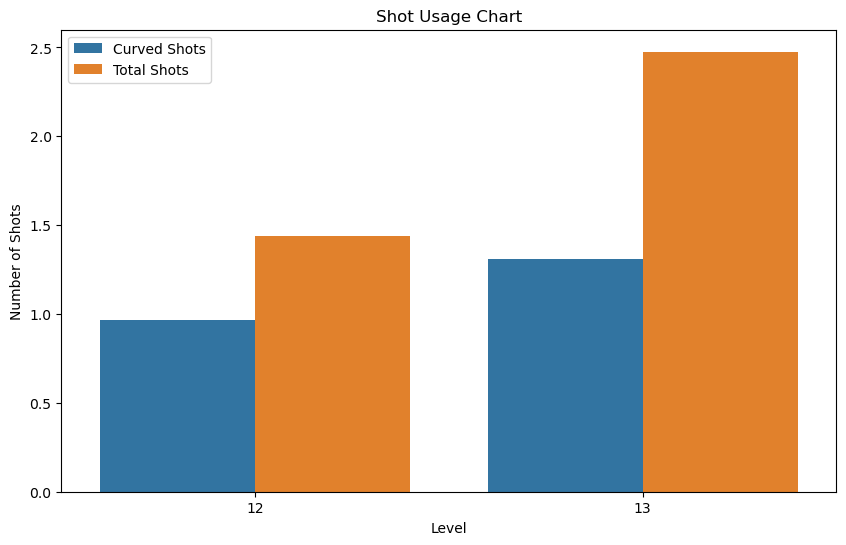

In [6]:
filtered_data = analytics_data_clean[analytics_data_clean['currentLevel'].isin([12, 13])]

melted_data = filtered_data.melt(id_vars='currentLevel', value_vars=['curvedShotsTaken', 'shotsTaken'], var_name='Shot Type', value_name='Count')


# Plot the graph with renamed legend
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='currentLevel', y='Count', hue='Shot Type', data=melted_data, edgecolor=(0, 0, 0, 0), ci=None)
plt.xlabel('Level')
plt.ylabel('Number of Shots')
plt.title('Shot Usage Chart')

# Rename the legend
handles, labels = bar_plot.get_legend_handles_labels()
bar_plot.legend(handles, ['Curved Shots', 'Total Shots'])

plt.show()